In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Lagrange multipliers

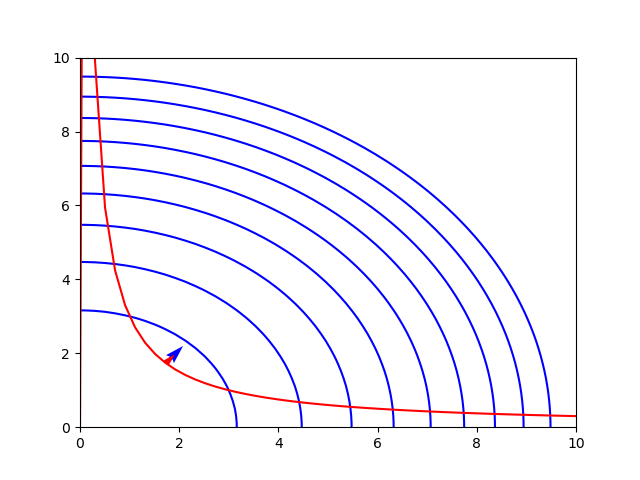

In [2]:
#Lagrange multiplier and contour plot illustration

#example
# f = x**2 + y**2 (euclidean distance)
# g = xy = 3 constraint

x_mesh = np.linspace(-10,10,100)
y_mesh = np.linspace(-10,10,100)
X,Y = np.meshgrid(x_mesh,y_mesh)

#input
x = np.sqrt(3)
#work out position of constraint
y = 3/x

#direvtional derivative of f
f = X**2 + Y**2
fx = 2*x
fy = 2*y

#directional derivative of g = xy
gy_ = 3/x_mesh
gx = y
gy = x

#finding solution with lagrange.....
np.array([])

fig,ax = plt.subplots()
ax.set_ylim(0,10)
ax.set_xlim(0,10)
ax.contour(X,Y,f, [i for i in range(0,100,10)], colors = "blue")
ax.plot(x_mesh,gy_,color = "red")

ax.quiver(x,y,fx/100,fy/100,color = "blue", scale = True)
ax.quiver(x,y,gx/100,gy/100,color = "red", scale = True)





C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:25: RuntimeWarning: divide by zero encountered in log
  z = (3 - np.log(x))/y
C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:25: RuntimeWarning: invalid value encountered in log
  z = (3 - np.log(x))/y
C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:25: RuntimeWarning: divide by zero encountered in divide
  z = (3 - np.log(x))/y
C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:32: RuntimeWarning: divide by zero encountered in log
  y = 3 - np.log(x)
C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:32: RuntimeWarning: invalid value encountered in log
  y = 3 - np.log(x)


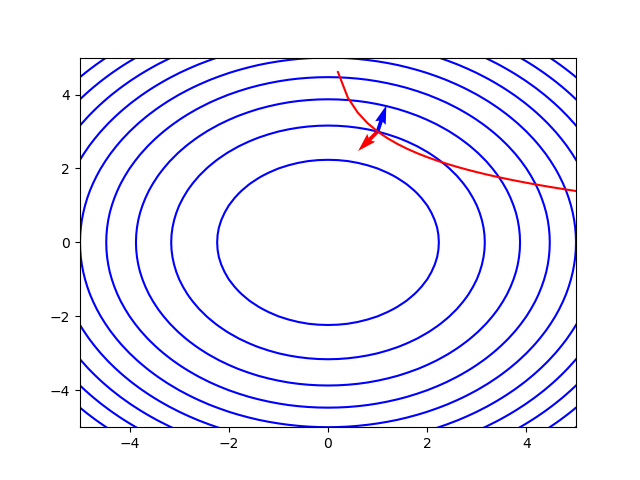

In [142]:
#repeating above with a more complex contraint function
# f = x**2 + y**2 (euclidean distance)

x_mesh = np.linspace(-10,10,101)
y_mesh = np.linspace(-10,10,101)
X,Y = np.meshgrid(x_mesh,y_mesh)

#funcion f and its direvtional derivative
def f1(x,y):
    z = x**2 + y**2
    return z

f = f1(X,Y)

def grad_f1(x,y,scale = False):
    dfdx = 2*x
    dfdy = 2*y
    V = np.array([dfdx,dfdy])
    out = V/np.linalg.norm(V) if scale else V #ternary expression?
    return out

# function g and its directional derivative
def g1(x,y):
    # g = (3 - ln(x) )/y = 1  constraint (same as y = -ln(x) + 3)
    z = (3 - np.log(x))/y
    return z

def g1_help(x):
    # when g = 1
    # 1 = (3-ln(x))/y
    # y = 3 - ln(x)
    y = 3 - np.log(x)
    return y

def grad_g1(x,y,scale = False):  
    dgdx = -1/(x*y)
    dgdy = (np.log(x)-3)*(y**(-2))
    V = np.array([dgdx,dgdy])
    out = V/np.linalg.norm(V) if scale else V #ternary expression?
    return out

g = g1(X,Y)  
gy = g1_help(x_mesh)


#plotting
fig,ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)

#plot f
ax.contour(X,Y,f, [i for i in range(0,100,5)], colors = "blue")


# plot g (constraint)
#ax.contour(X,Y,g, [i for i in range(0,5,1)], colors = "red")
ax.plot(x_mesh,gy,color = "red")


#plot derivatives
#choose a point
x = 1
y = g1_help(x)
#plot directional derivatives
ax.quiver(x,y,*grad_f1(x,y),color = "blue")
ax.quiver(x,y,*grad_g1(x,y),color = "red")

#at minimum direction of gradients will be the same



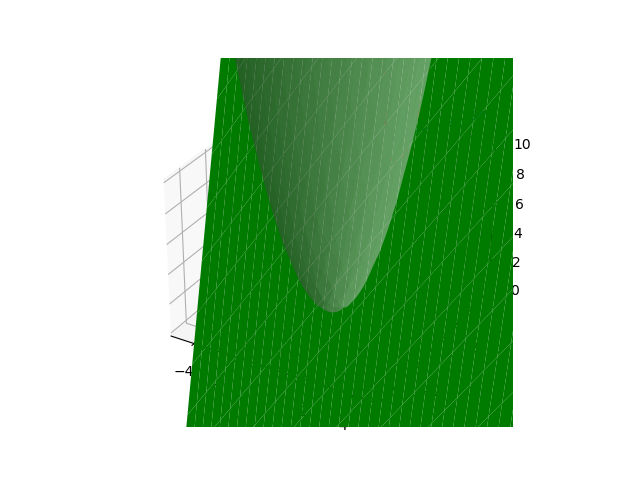

In [141]:

gZ = f1(x_mesh,gy)

#plotting
fig = plt.figure()
ax = fig.add_subplot(111,projection= "3d")
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,10)

# 3d plot and contour plan
Z = f1(X,Y)
ax.plot_surface(X,Y,Z,color = "lightgrey",alpha = 0.3)

#plot constaint line
ax.plot(x_mesh,gy,gZ,color = "red")

#plot vector norm
# -[dfdx,dfdy,-1]
x = 1
y = g1_help(x)
normal_vector = [*grad_f1(x,y,scale = False),-1] #be carfeul about axis scaling
ax.quiver(x,y,f1(x,y),*normal_vector)

#proof is in the plane
Z_plane = -normal_vector[0]/normal_vector[2]*(X-x)-normal_vector[1]/normal_vector[2]*(Y-y)+f1(x,y)
ax.plot_surface(X,Y,Z_plane,color = "green")


In [83]:
[x,y,*grad_g1(x,y)]
[x,y,*grad_f1(x,y)]

[1, 3.0, 0.9486832980505138, 0.31622776601683794]

# solving using lagrange multipliers



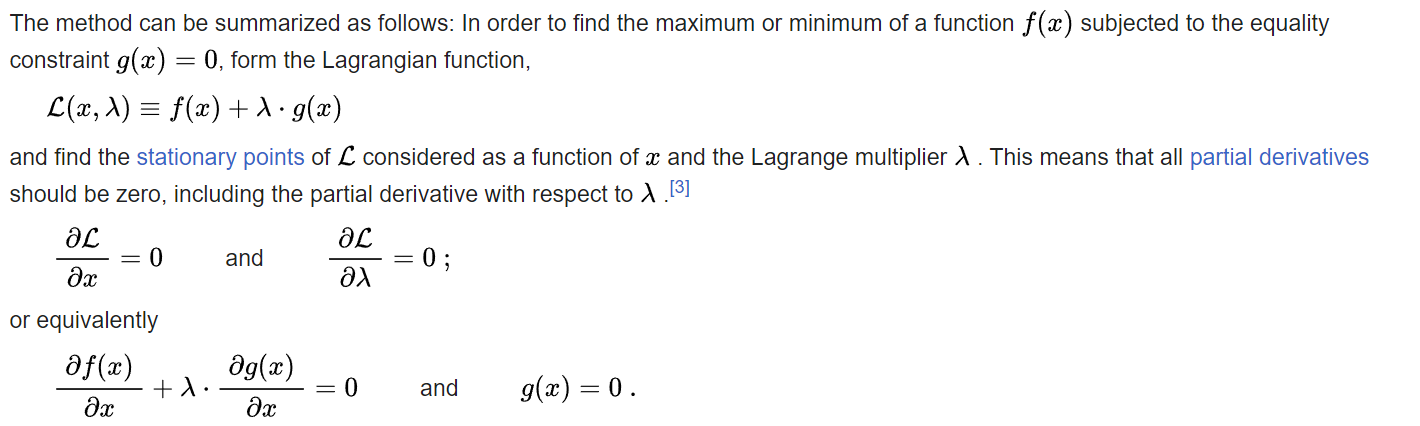



in other words we need the grdient vectors to be parralell 

$\nabla f = \lambda \nabla g $

MAKES SENSE!

example 2


$f = x^2 + y^2 \\
g = \dfrac{3-ln(x)}{y} $


$ \nabla f =  \begin{bmatrix}
           2x \\
           2y \\
         \end{bmatrix}$

         
$ \nabla g =  \begin{bmatrix}
           -\dfrac{1}{xy} \\
           \dfrac{ln(x)-3}{y^2} \\
         \end{bmatrix}$

and must satify constraint g = 1

# so 3 equations and 3 unknowns

doing a bit of movie magic - algebra we get the answer as 

$ solution is numerically messy $

$ \lambda = -2y^2 $

$ e^{3-x^2} = x $

$ x \approx 1.59214293705809 $

C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:32: RuntimeWarning: divide by zero encountered in log
  y = 3 - np.log(x)
C:\Users\bruno\AppData\Local\Temp\ipykernel_5828\1628497284.py:32: RuntimeWarning: invalid value encountered in log
  y = 3 - np.log(x)


array([-1.86517468e-14,  0.00000000e+00])

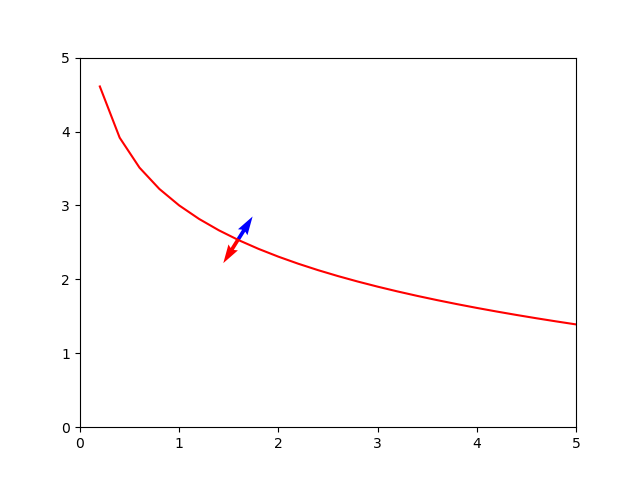

In [160]:
# lets test it
x = 1.59214293705809
y = g1_help(x)

fig,ax = plt.subplots()
ax.set_xlim(0,5)
ax.set_ylim(0,5)
# plot g (constraint)
ax.plot(x_mesh,g1_help(x_mesh),color = "red")

#plot derivatives
#plot directional derivatives
ax.quiver(x,y,*grad_f1(x,y),color = "blue")
ax.quiver(x,y,*grad_g1(x,y),color = "red")

grad_f1(x,y)+((2*y**2)*grad_g1(x,y))

#HES FUCKING DONE IT!!!

# WOW MAKES SENSE!!!